# sklearn库学习报告
## 学习目的
* 数据分析和处理是Python的一种重要用途，同样在我们微电子专业中也发挥着极其重要的作用，本次实验报告以sklearn库为基础，学习基本的数据分析方法和一些统计方法，并辅以实例进行实验
* 在校内跟随导师参加科研项目的过程中，我深感数学建模的重要性，但在自学MATLAB时，一方面MATLAB安装配置等麻烦，另一方面其社区和文档等也不如python健全，因此本次我特意选择sklearn库学习基本的数学统计和建模知识，顺便加强对于python的使用
* 本次报告受时间因素，主要研究sklearn中的监督学习部分,无监督学习部分计划在后续进行研究，另一方面无监督学习方面更适合使用TensorFlow或pytorch等深度学习框架进行学习，故此报告中暂不涉及

## 实验环境
* Python3+环境
* sklearn库
* anaconda环境

## 前备知识
* 文档说明部分采用jupyter附带的Markdown格式展现，切换到Markdown格式运行即可
* 需了解基本的numpy操作和plt绘图函数
* 数学推导方面涉及基本的概率论和高数，线代知识(基本都是课本上的知识)，还有部分泛函分析内容(这部分是边百度边学的)

## 报告参考
* 本报告主要参考[sklearn官方文档](https://scikit-learn.org/stable/supervised_learning.html)
* 部分demo和讲解参考CSDN

## 报告说明
* 本报告主要目标为学会sklearn库相关函数的调用方法，重在理解各个模型的适用场景，以及其基本原理和优缺点，有些太过复杂模型的具体数学推理过程，受到数学水平和书写的限制，在本次学习报告中暂不作推导
* 本次实验建议在运行前，在anaconda中将ipykernel内核切换为anaconda中其他环境(例如base),在base内安装sklearn库，这样比较便于操作
* 相关安装命令如下
``` bash
python -m ipykernel install --name base
pip install scikit-learn
```

## 1.广义线性模型学习
广义线性模型:即基本的线性模型，其中目标值y是输入变量x的线性组合，即$\hat{y}(w, x)=w_{0}+w_{1} x_{1}+\ldots+w_{p} x_{p}$
在整个模块中，我们定义$w=\left(w_{1}, \ldots, w_{p}\right)$作为*coef_*,定义w0作为`intercept_`
### 1.1普通最小二乘法的实现，其核心代码和实例如下：

In [1]:

from sklearn import linear_model
reg=linear_model.LinearRegression()
# 调用相应的fit方法来拟合数组x，y并将线性模型的系数w存储在成员变量coef_中
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])   
print(reg.coef_)

[0.5 0.5]


(442, 10)
(442, 1)
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


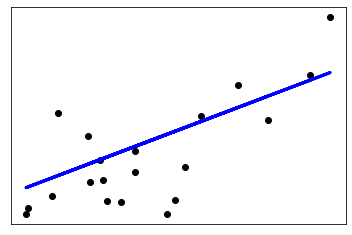

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# 本部分作为最小二乘法的实例
# 首先加载数据集dia，sklearn中本身自带的数据集，该数据集包括442个病人的生理数据合一年后的病情发展
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# 下面部分是对相应的线性数据进行数据预处理
print(diabetes_X.shape)
# 因为要进行线性处理，所以使用一个特征即可,，相当于把数据集转化为442*1*10后，在第三个维度的第10个系列中选取第三个序列
diabetes_X = diabetes_X[:, np.newaxis, 2]
print(diabetes_X.shape)
# 数组切片，将其分为训练集和验证集
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# 同样对结果进行分片操作
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# 创造线性模型
regr = linear_model.LinearRegression()

# 用训练集进行训练
regr.fit(diabetes_X_train, diabetes_y_train)

# 用上述线性模型进行预测
diabetes_y_pred = regr.predict(diabetes_X_test)

# 输出线性系数
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# 以图的形式进行展示
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 1广义线性模型学习
### 1.2.岭回归
> 上述演示了最小二乘法，但其仍还存在一些问题，因此在此我们引入了岭回归的方法，岭回归(Ridge)通过对于系数的大小，加入相应的惩罚项，其系数的最小化为带罚项的残差平方和，其公式如下:
$\min _{w}\|X w-y\|_{2}^{2}+\alpha\|w\|_{2}^{2}$
* 其核心代码和演示demo如下
* 其demo演示了岭回归相对于普通最小二乘法的优势，即对于高度病态矩阵的有用性。对于这样的矩阵，目标变量的微小变化会导致计算出的权重产生巨大的差异。在这种情况下，设置一定的正则化(alpha)来减少这种变化(噪声)是极其有效的

In [25]:
# 核心代码展示
from sklearn import linear_model
reg=linear_model.Ridge(alpha=.5)
reg.fit([[0,0],[0,0],[1,1]],[0,.1,1])
print(reg.coef_)    #w1和w2
print(len(reg.coef_))
print(reg.intercept_)   #w0

[0.34545455 0.34545455]
2
0.1363636363636364


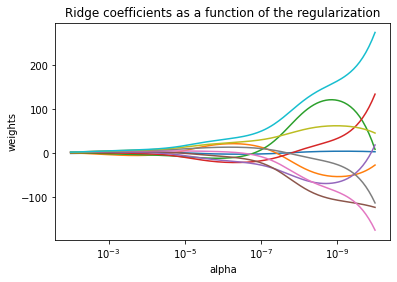

In [6]:
# demo展示，展示了通过惩罚项系数变化，对于线性模型建立的改变情况
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#建立一个10*10的矩阵
x=1.0/(np.arange(1,11)+np.arange(0,10)[:,np.newaxis])
y=np.ones(10)
n_alphas=200
alphas=np.logspace(-10,-2,n_alphas)   #生成对数等比数列

coefs=[]   #计算后同样为10*10的矩阵
for a in alphas:
    #加载岭回归模型
    ridge=linear_model.Ridge(alpha=a,fit_intercept=False)
    #进行训练
    ridge.fit(x,y)
    coefs.append(ridge.coef_)
ax = plt.gca()
# 绘制曲线图
ax.plot(alphas, coefs)
#设置x轴，以对数形式展现
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()    #展示绘制图表


## 1.广义线性模型学习
### 1.3.Lasso
> Lasso是一种拟合稀疏系数的线性模型，它倾向于使用具有较少参数值的情况，可以有效减少给定解决方案所依赖的变量数量，因此，Lasso和其变体是压缩感知领域的基础，在数学公式表达上，它由一个带有先验的正则表达项的线性模型组成，其最小化的目标函数为:
$\min _{w} \frac{1}{2 n_{\text {samples }}}\|X w-y\|_{2}^{2}+\alpha\|w\|_{1}$
* Lasso的最核心用途就是进行数据降维,如图随着维度增大，会发生维度灾难的情况，此时就需要压缩降维
![维度灾难](https://img-blog.csdnimg.cn/20200812212319997.png)
* 如下是调用Lasso方法的核心demo

In [28]:
from sklearn import linear_model
#调用Lasso模型
reg=linear_model.Lasso(alpha=0.1)
#进行训练
reg.fit([[0,0],[1,1]],[0,1])
#输出相关系数
print(reg.coef_)
print(reg.intercept_)
#进行预测
print(reg.predict([[1,1]]))

[0.6 0. ]
0.2
[0.8]


## 1.广义线性模型学习
### 1.4.多任务Lasso
>`MultiTaskLasso`是一个估计多元回归稀疏系数的线性模型:`y`是一个形状为`(n_samples,n_tasks)`的二维数组，其约束条件和其他回归问题相同，都是所选择的特征值
* 在数学上，它由一个线性模型组成，以混合的l1和l2作为正则化器进行训练，其目标函数最小化是:
$\min _{w} \frac{1}{2 n_{\text {samples }}}\|X W-Y\|_{\text {Fro }}^{2}+\alpha\|W\|_{21}$
* 此处引用了F范数的特性，即Fro，其具体含义为:
$\|A\|_{F r o}=\sqrt{\sum_{i j} a_{i j}^{2}}$
* 多任务Lasso和Lasso之间的一大区别就在于，由于不同的正则项，`Lasso`在拟合时间序列函数时会产生分散的非零值（换个说法就是导致稀疏），而`Multi-task Lasso`尽可能的利用了每个特征，所以并没有导致稀疏解。
* 如下为多任务Lasso和Lasso，对于拟合时间序列进行比对的demo:

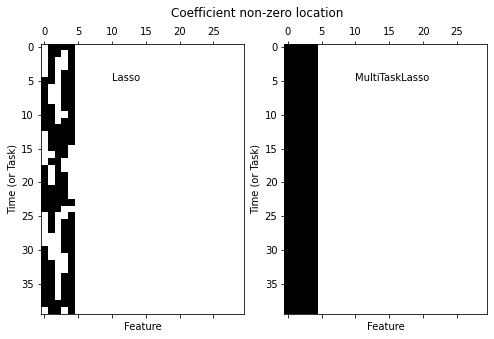

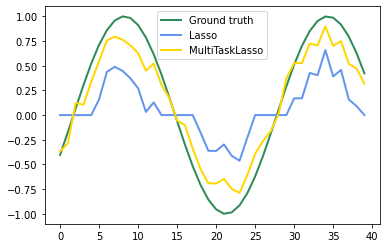

In [29]:
import numpy as np
from sklearn.linear_model import MultiTaskLasso,Lasso
import matplotlib.pyplot as plt
rng = np.random.RandomState(42)
# 用随机频率和相位正弦波生成随机数据
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)    #调用linspace函数，生成等差数列数据,将0到2π之间划分为40段
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)  #生成正态分布
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)
coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])   #用Lasso进行模型拟合
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X, Y).coef_   #用MultiLasso进行模型拟合
# 以图表的形式展现
fig = plt.figure(figsize=(8, 5))
#划分图像
plt.subplot(1, 2, 1)
#展示矩阵
plt.spy(coef_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "Lasso")
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "MultiTaskLasso")
fig.suptitle("Coefficient non-zero location")
#绘制核心图像
feature_to_plot = 0
plt.figure()
lw = 2
#展示实际图像
plt.plot(coef[:, feature_to_plot], color="seagreen", linewidth=lw, label="Ground truth")
#展示losso拟合图像
plt.plot(
    coef_lasso_[:, feature_to_plot], color="cornflowerblue", linewidth=lw, label="Lasso"
)
#展示多任务Lasso拟合图像
plt.plot(
    coef_multi_task_lasso_[:, feature_to_plot],
    color="gold",
    linewidth=lw,
    label="MultiTaskLasso",
)
plt.legend(loc="upper center")
plt.axis("tight")
#限制y轴范围
plt.ylim([-1.1, 1.1])
plt.show()


## 1.广义线性模型学习
### 1.5.弹性网络
> 弹性网络是一种使用L1,L2范数作为先验正则项训练的线性回归模型，弹性网络与Lasso相比，都允许拟合到一个只有少数参数是非零稀疏的模型，但在很多特征互相联系的情况下，Lasso很可能只随机考虑这些特征的一个，但弹性网络可以倾向于选择两个，其最小化的目标函数为
$\min _{w} \frac{1}{2 n_{\text {samples }}}\|X w-y\|_{2}^{2}+\alpha \rho\|w\|_{1}+\frac{\alpha(1-\rho)}{2}\|w\|_{2}^{2}$
* 如下为弹性网络的使用demo:

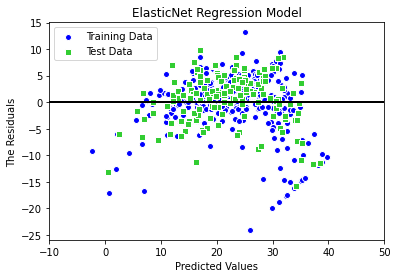


MSE Train in ElasticNet: %.3f, Test: %.3f
R^2 Train in ElasticNet: 0.668, Test: 0.714


In [30]:
from sklearn import datasets
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
price=datasets.load_boston()   #导入数据集
X=price.data
y=price.target
#划分数据集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

elastic_net=ElasticNet(alpha=1.0,l1_ratio=0.5)  #使用弹性网络训练数据集
elastic_net.fit(X_train,y_train)
y_train_pred=elastic_net.predict(X_train)    #进行预测
y_test_pred=elastic_net.predict(X_test)
# 绘制相关图表
#绘制训练数据散点图
plt.scatter(y_train_pred,y_train_pred-y_train,
            c='blue',marker='o',edgecolor='white',
            label='Training Data')
#绘制验证数据散点图
plt.scatter(y_test_pred,y_test_pred-y_test,
            c='limegreen',marker='s',edgecolors='white',
            label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("The Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.title("ElasticNet Regression Model")
plt.show()

print("\nMSE Train in ElasticNet: %.3f, Test: %.3f")

print("R^2 Train in ElasticNet: %.3f, Test: %.3f" % \
      (r2_score(y_train,y_train_pred),
       r2_score(y_test,y_test_pred)))


## 1.广义线性模型学习
### 1.6.正交匹配追踪法
> `OrthogonalMatchingPursuit` (正交匹配追踪法)使用了 OMP 算法近似拟合了一个带限制的线性模型，该限制影响于模型的非0系数，OMP是贪心算法的实例之一，它正是基于每一步的贪心算法，其每一步元素都是与当前残差高度相关的，在每一次迭代中，都可以利用正交投影到之前元素，来重新计算残差
* 其实例demo如下:

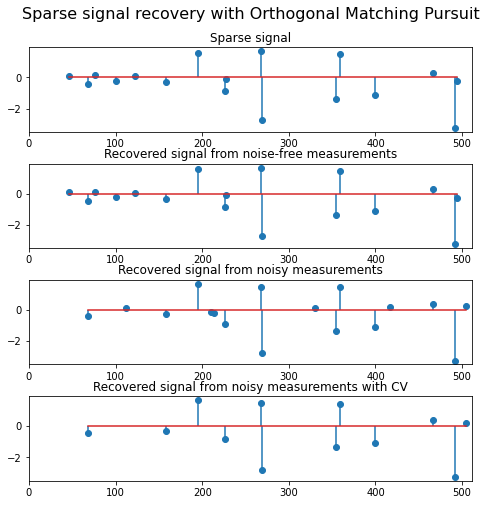

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

n_components, n_features = 512, 100
n_nonzero_coefs = 17

# 生成相关数据

#生成训练数据
y, X, w = make_sparse_coded_signal(
    n_samples=1,
    n_components=n_components,
    n_features=n_features,
    n_nonzero_coefs=n_nonzero_coefs,
    random_state=0,
)

(idx,) = w.nonzero()

# 对信号增加噪声
y_noisy = y + 0.05 * np.random.randn(len(y))

# 绘制结果图像
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx], use_line_collection=True)

# 绘制无噪声的重构图
# 使用OMP进行拟合
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs, normalize=False)
# 训练模型
omp.fit(X, y)
coef = omp.coef_
(idx_r,) = coef.nonzero()
#绘制结果图表
#划分图像区域
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# 绘制噪声重构图
omp.fit(X, y_noisy)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# 用CV设置的非零数绘制噪声重建
omp_cv = OrthogonalMatchingPursuitCV(normalize=False)
#使用OMPcv拟合线性模型
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle("Sparse signal recovery with Orthogonal Matching Pursuit", fontsize=16)
plt.show()

## 1.广义线性模型学习
### 1.7.贝叶斯回归
> 接下来我们将学习著名的贝叶斯回归，其可以用在预估阶段的参数正则化，为了得到一个全概率模型，输出y也被认为是关于Xw的高斯分布
---
#### 先备知识(贝叶斯需要深入理解)
1. 贝叶斯公式的具体内涵:在事件A已经发生的条件下，贝叶斯公式可用来寻找导致A发生各种原因B的概率
2. 先验概率:由以往数据分析所得
   后验概率:在得到某个信息后重新修正的概率
---
* 为了得到一个全概率模型，输出y也被认为是关于Xw的高斯分布，其公式为:
$p(y \mid X, w, \alpha)=\mathcal{N}(y \mid X w, \alpha)$
+ 优点:它能根据已有的数据进行改变，并能在估计过程中引入正则项
+ 缺点:其缺点也是显而易见的，它的推断过程非常耗时
---
#### 贝叶斯岭回归
* 贝叶斯岭回归和正常回归区别为，其先验参数w是由球面高斯公式得出的，其公式为:
$p(w \mid \lambda)=\mathcal{N}\left(w \mid 0, \lambda^{-1} \mathbf{I}_{\mathbf{p}}\right)$
* 下面给出贝叶斯岭回归的函数和相关demo

In [32]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)   #进行训练
print(reg.coef_)
print(reg.intercept_)   #输出相关系数
reg.predict([[1,0.]])   
#可以看出，在这种情况下，贝叶斯岭回归法和最小二乘法只有细微的差别

[0.49999993 0.49999993]
1.9999946720972162e-07


array([0.50000013])

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression
# 贝叶斯岭回归实例
np.random.seed(0)    #照例生成随机数
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # 创建高斯分布的数据
lambda_ = 4.
w = np.zeros(n_features)
# 保持10个特征数据即可
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_)) #真实系数
# 对生成的随机数据增加噪声
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# 相加生成对应值
y = np.dot(X, w) + noise


# 用上述提到的贝叶斯岭回归函数对数据进行训练
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)
#print(clf.coef_)
ols = LinearRegression()
ols.fit(X, y)

# 绘制相关图表
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
       label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.show()
# 从图中可以看出贝叶斯岭回归预测的系数，跟真实系数重合度还是比较匹配的

## 1.广义线性模型学习
### 1.8.logistic回归
> logistic回归是一种解决分类问题的重要线性模型，可以说是机器学习领域中的一类重要回归模型，在众多机器学习库中都曾见过相应的函数，其本质为对数线性分类器
* scikit-learn 中 logistic 回归在 `LogisticRegression` 类中实现了二分类、一对多分类）及多项式 logistic 回归，并带有可选的 L1 和 L2 正则化
* 作为优化问题，对于带有二分类logistuc回归，在带L2罚项的二分类logistic回归要最小化以下代价函数:
$\min _{w, c} \frac{1}{2} w^{T} w+C \sum_{i=1}^{n} \log \left(\exp \left(-y_{i}\left(X_{i}^{T} w+c\right)\right)+1\right)$
* 著名的logistic函数:
![logisti函数](https://img-blog.csdnimg.cn/img_convert/7c3a03c7619139a0b960a24667bf7bb1.png)

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
# 选取该数据集，方便完成进行二分类
breast_cancer = load_breast_cancer()   #加载数据集
from sklearn.model_selection import train_test_split

diabetes_x = breast_cancer.data    #各个参数值
diabetes_y = breast_cancer.target  #预测值
# 划分数据集，将其划分为训练集和预测集
x_train,x_test,y_train,y_test =train_test_split(diabetes_x, diabetes_y, test_size=0.3)
log = LogisticRegression()
log.fit(x_train,y_train)   #进行预测
count = 0
l = len(y_test)
print(l)
for i in range(l):
    if log.predict(x_test)[i]!=y_test[i]:
        count+=1
print(count)  #预测失败的数量

print(1-count/l)#输出准确率
# 从此数据集可以看出，logistic回归对于二分类问题，预测率可以稳定在90%以上

171
6
0.9649122807017544


D:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 1.广义线性模型学习
### 1.9.随机梯度下降(SGD)
> 随机梯度下降是拟合线性模型简单而又高效的算法，在机器学习领域尤其发挥着重要的作用，在样本数和特征数很大时尤其有用，`SGDClassifier`和 `SGDRegressor` 分别用于拟合分类问题和回归问题的线性模型，可使用不同的（凸）损失函数，支持不同的罚项
* SGD的可视化展示:
![SGD](https://pic3.zhimg.com/80/v2-1e416aa9cdda83ebd8b4276fc3fd2fa6_720w.jpg)
* 因为SGD的重要程度，因此在此给出其具体数学推导过程:
* 首先预测结果为:$h_{\theta}=\sum_{j=0}^{n} \theta_{j} x_{j}$
* 因此其损失为:$h_{\theta}=\sum_{j=0}^{n} \theta_{j} x_{j}J_{\text {train }}(\theta)=1 /(2 m) \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$
* 因此下降梯度为:
$\begin{aligned}
\frac{\partial}{\partial \theta_{j}} J(\theta) &=\frac{\partial}{\partial \theta_{j}} \frac{1}{2}\left(h_{\theta}(x)-y\right)^{2} \\
&=2 \cdot \frac{1}{2}\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(h_{\theta}(x)-y\right) \\
&=\left(h_{\theta}(x)-y\right) \cdot \frac{\partial}{\partial \theta_{j}}\left(\sum_{i=0}^{n} \theta_{i} x_{i}-y\right) \\
&=\left(h_{\theta}(x)-y\right) x_{j}
\end{aligned}$

* 如下是其使用demo

In [35]:
# sklearn中提供的随机梯度下降类。
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples=1000, n_features=5, bias=2.5, coef=True,
        noise=5, random_state=0)   #加载数据集数据
print(f"真实权重：{coef}")   #首先输出真实权重
# eta0 指定初始学习率。
sgd = SGDRegressor(eta0=0.2, max_iter=100)
sgd.fit(X, y)
print(f"预测权重：{sgd.coef_}")
print(f"预测截距：{sgd.intercept_}")
print(f"R^2值：{sgd.score(X, y)}")


真实权重：[41.20593377 66.49948238 10.71453179 60.19514224 25.96147771]
预测权重：[41.66810502 66.9069806  10.99712585 60.43853684 25.32509886]
预测截距：[2.33617764]
R^2值：0.9973607499275474


## 1.广义线性模型学习
### 1.10.感知器(Perceptron)
> 感知器是一种适用于大规模学习的简单算法，其在正常情况下不需要设置学习率，且不需要正则化处理，仅使用错误样本就可更新模型
* 感知器算法是神经网络中的典型结构，其主要特征就是赏罚概念，在分类正确时，对正确的权重w赏，即w不变；当分类错误时，对权重向量罚，即将权重向量w向正确的方向转变
* 其实现demo如下所示:

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1

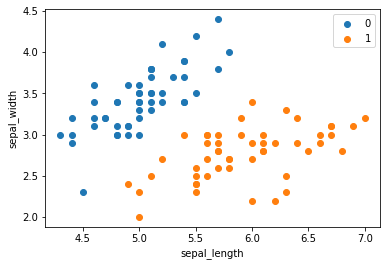

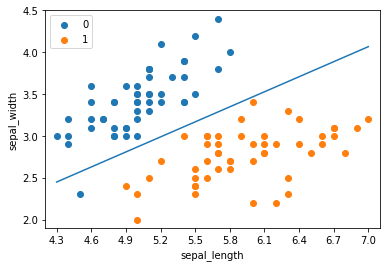

In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
# 将数据存储到df中
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
print(df)   #可以看出其数据集有四个特征，speal的长宽和petal的长宽
# 截取前100行，且只包含0,1两类
df = df.iloc[:100, [0, 1, -1]]
df.columns = ['sepal_length', 'sepal_width', 'label']
# 绘制原始数据的图表
plt.figure()
plt.scatter(df.iloc[:50, 0], df.iloc[:50,1], label='0')
plt.scatter(df.iloc[50:100, 0], df.iloc[50:100,1], label='1')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
data = np.array(df)
X, y = data[:,:-1], data[:,-1]
y[y==0] = -1   #此处将标签0改为1，是为了符合感知器二分类的特点
from sklearn.linear_model import Perceptron
# 进行感知器学习
perceptron = Perceptron(fit_intercept=True, max_iter=1000, shuffle=True)
perceptron.fit(X, y)  # 默认学习率为1
w = perceptron.coef_[0]  # ,注意输出的是二维数组，加上[0]后， w=[ 23.2 -38.7]
b = perceptron.intercept_  # 系数
# 画出感知器生成的线性回归
fig = plt.figure()
# 创建对应等差数列
x_ticks = np.linspace(4.3,7,10)
ax = plt.subplot(1,1,1)
ax.set_xticks(x_ticks)
ax.set_xlim(4.2,7.1)
ax.set_ylim(1.9,4.5)
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
#绘制相关散点
plt.scatter(df.iloc[:50, 0], df.iloc[:50,1], label='0')
plt.scatter(df.iloc[50:100, 0], df.iloc[50:100,1], label='1')
# 绘制拟合线性模型
plt.plot(x_ticks, (w[0]*x_ticks + b)/(-w[1]))
plt.legend(loc = 'best')




## 2.线性和二次判别分析
> 线性判别分析`discriminant_analysis.LinearDiscriminantAnalysis`二次判别分析`iscriminant_analysis.QuadraticDiscriminantAnalysis`是两个经典的分类器，正如他们名字所描述的那样，他们分别代表了线性决策平面和二次决策平面。
* 两种判别方法LDA和QDA都是源自于简单的概率模型，这些模型对于每一个类别$k$的相关分布$P(X|y=k)$都可以通过贝叶斯定理来获得，其具体公式为:
$P(y=k \mid X)=\frac{P(X \mid y=k) P(y=k)}{P(X)}=\frac{P(X \mid y=k) P(y=k)}{\sum_{l} P(X \mid y=l) \cdot P(y=l)}$
* 我们选择最大化条件概率的类别$k$
* 下面的demo展示了两类判别在特定数据集上的区别

In [25]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#设置相关数据集
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
#调用线性模型
clf = LinearDiscriminantAnalysis()
#进行拟合
clf.fit(X, y)
#预测结果
print(clf.predict([[-0.8, -1]]))
#调用二次判别模型，过程如上
clf1 = QuadraticDiscriminantAnalysis()
clf1.fit(X, y)
QuadraticDiscriminantAnalysis()
print(clf1.predict([[-0.8, -1]]))

[1]
[1]


## 2.线性和二次判别分析
### 2.1 使用线性判别分析来降维
> `discriminant_analysis.LinearDiscriminantAnalysis`通过把输入的数据投影到由最大化类间分离所组成的线性子空间，来执行有监督降维,因此其输出的维度必然会比原来的类别数量更少的。因此它总体而言是十分强大的降维方式，同样也仅仅在多分类环境下才能感觉到，可以有效避免`维度爆炸`这一情况
* 
* 下面是其实现降维的具体demo

explained variance ratio (first two components): [0.92461872 0.05306648]


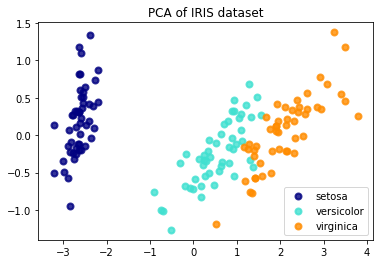

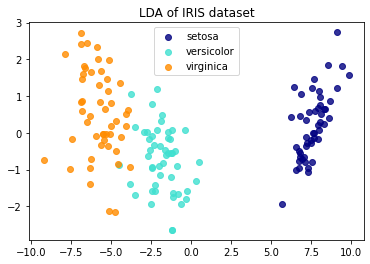

In [26]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()   #记载数据集
# 读取相关数据
X = iris.data
y = iris.target
target_names = iris.target_names
# 利用非线性分析降维
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
# l利用线性分析降维
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# 输出相关系数
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)
# 根据数据绘制图表
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
# 绘制散点
for color, i, target_name in zip(colors, [0, 1, 2], target_names): 
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

## 2.线性和二次判别分析
### 2.2 收缩
> 收缩是一种在训练样本数量相比特征而言很小的情况下，提升的协方差矩阵预测准确性的工具。 在这种情景中，经验样本协方差是一个很差的预测器
`shrinkage` 参数的值可以手动被设置为 0-1 之间。特别地，0 值对应着没有收缩（这意味着经验协方差矩阵将会被使用），而 1 值则对应着完全使用收缩（意味着方差的对角矩阵将被当作协方差矩阵的估计），将此参数设置为这两个极值之间的值将估计协方差矩阵的一个收缩版本。
> 关于协方差矩阵这一重要概念，在此不多加赘述，详细可见这篇文章的解读:[协方差矩阵概念](https://zhuanlan.zhihu.com/p/37609917)
* 此demo为有收缩和无收缩LDA分类器的比较

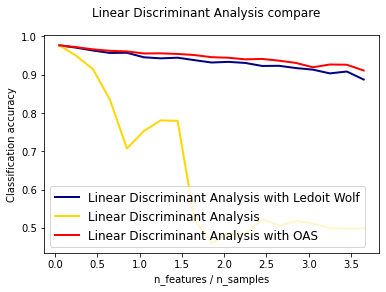

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import OAS


n_train = 20  # 训练集大小
n_test = 200  # 验证集大小
n_averages = 50  # 分类频率
n_features_max = 75  # 特征最大值
step = 4  # 每次迭代步数


def generate_data(n_samples, n_features):
    
    # 生成数据集，具体为有n_samples个数据，数据有一个特征，特征的类型为-2和2
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # 在水平方向进行平铺
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y


acc_clf1, acc_clf2, acc_clf3 = [], [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2, score_clf3 = 0, 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)   #生成训练数据
        # 有收缩LDA分类器
        clf1 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto").fit(X, y)
        # 无收缩LDA分类器
        clf2 = LinearDiscriminantAnalysis(solver="lsqr", shrinkage=None).fit(X, y)
        # 协方差估计收缩
        oa = OAS(store_precision=False, assume_centered=False)
        clf3 = LinearDiscriminantAnalysis(solver="lsqr", covariance_estimator=oa).fit(
            X, y
        )
        # 生成测试数据并预测
        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)
        score_clf3 += clf3.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)
    acc_clf3.append(score_clf3 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train
# 绘制相关图表
# 绘制Ledoit Wolf拟合的线性模型
plt.plot(
    features_samples_ratio,
    acc_clf1,
    linewidth=2,
    label="Linear Discriminant Analysis with Ledoit Wolf",
    color="navy",
)
#绘制线性模型
plt.plot(
    features_samples_ratio,
    acc_clf2,
    linewidth=2,
    label="Linear Discriminant Analysis",
    color="gold",
)
# 绘制OAS拟合的线性模型
plt.plot(
    features_samples_ratio,
    acc_clf3,
    linewidth=2,
    label="Linear Discriminant Analysis with OAS",
    color="red",
)

plt.xlabel("n_features / n_samples")
plt.ylabel("Classification accuracy")

plt.legend(loc=3, prop={"size": 12})
plt.suptitle(
    "Linear Discriminant Analysis compare"
)
plt.show()
# 从图像中我们可以很明显的看出加入收缩后的好处，在特征数逐渐超过样本数的情况下，在未引入收缩的情况下，预测准确率会出现
# 大幅度的下降，但在引入收缩时则会避免这种现象

## 3.支持向量机(SVM)
> 支持向量机可用于以下监督学习算法:分类，回归和异常检测
支持向量机的优势在于:
* 其在高维空间中非常高效
* 即使在数据维度比样本数量大的情况下仍然有效
* 在决策函数中使用训练集的子集，因此能高效利用内存
* 通用性:不同的核函数与特定的决策函数相对应

支持向量机的缺点包括:

* 如果特征数量比样本数量大得多,在选择核函数 核函数 时要避免过拟合, 而且正则化项是非常重要的.

* 支持向量机不直接提供概率估计,这些都是使用昂贵的五次交叉验算计算的

* ![SVM](https://img-blog.csdn.net/20140829134548371)

## 3.支持向量机(SVM)
### 3.1 支持向量机分类
> `SVC`,`NuSVC`和`LinearSvc`能够在数据集中实现多元分类
* 和其他分类器一样，SVC,NuSVC和linearSVC将两个数组作为输入:[n_samples,n_features]大小的数组X作为训练样本，[n_samples]大小的数组作为类别标签:
* 其实现demo如下

In [11]:
from sklearn import svm
X=[[0,0],[1,1]]
y=[0,1]
clf=svm.SVC(gamma='scale')
clf.fit(X,y)   #训练模型
print(clf.predict([[2.,2.]]))  #进行预测

[1]


## 3.支持向量机(SVM)
### 3.2 多元分类
> `SVC` 和 `NuSVC` 为多元分类实现了`one-against-one`的方法,如果 n_class 是类别的数量, 那么 n_class * (n_class-1)/2分类器被重构, 而且每一个从两个类别中训练数据. 为了提供与其他分类器一致的接口, decision_function_shape 选项允许聚合`one-against-one`分类器的结果成(n_samples, n_classes)的大小到决策函数:
* 如下为具体demo

In [12]:
from sklearn import svm
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')   #引入SVC
clf.fit(X, Y)   #进行训练
dec = clf.decision_function([[1]])
print(dec.shape[1]) # 分类器重构后，4 classes变为: 4*3/2 = 6
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
print(dec.shape[1]) # 4 classes



6
4


## 3.支持向量机(SVM)
### 3.3 非均衡问题
> 这个问题期望给予某一类样例能使用的关键词`class_weight`和`sample_weight`来提高权重，SVC在fit方法中生成了一个关键词`class_weight`,从而将`class_label`的参数C改为`C*value`
* 如下为演示demo

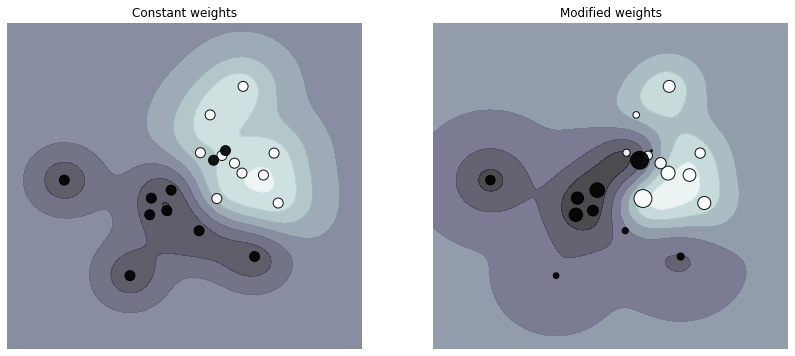

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # 生成横向矩阵和纵向矩阵
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))
    # 生成z，为后续绘制决策边界做准备
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制相关图表
    # 此处绘制决策边界
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    # 绘制点
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# 生成随机数种子
np.random.seed(0)
#生成随机数
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# F训练模型

# 引入SVC
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

# 引入SVC，并引入权重
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()

## 3.支持向量机(SVM)
### 3.4 回归问题
> 支持向量方法可以被扩展以解决回归问题，这个方法称为支持向量回归，支持向量回归有`SVR`,`NuSVR`和`LinearSVR`三种实现形式，与分类的类别一样, fit方法会调用参数向量 X, y, 只在 y 是浮点数而不是整数型.
* 支持向量分类生成的模型(如前描述)只依赖于训练集的子集,因为构建模型的代价函数不在乎边缘之外的训练点. 类似的,支持向量回归生成的模型只依赖于训练集的子集, 因为构建模型的代价函数忽略任何接近于模型预测的训练数据.
* 其具体demo实现如下

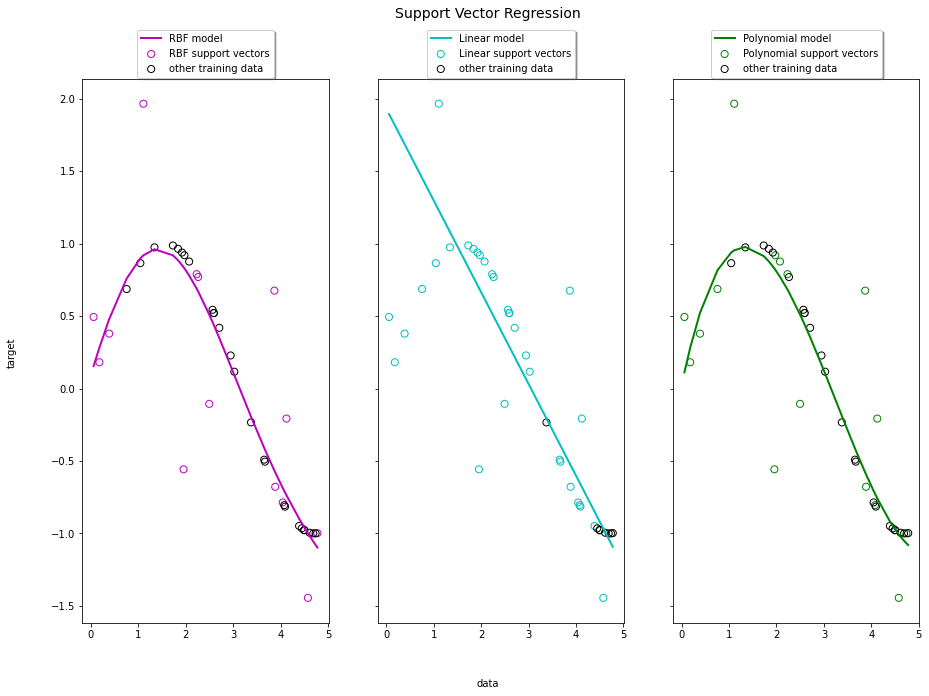

In [2]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
X = np.sort(5 * np.random.rand(40, 1), axis=0)   #生成随机数
y = np.sin(X).ravel()     #将数据降维
# 对数组切片增加噪声,每隔5个加一个
y[::5] += 3 * (0.5 - np.random.rand(8))
# 建立三种SVR模型
# 分别对应RBF，线性和多项式三种核函数
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
# 多项式回归
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
lw = 2
# 进行回归并绘制相关图表
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),     #使用三种模型训练后进行预测
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    # 绘制散点
    axes[ix].scatter(    
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()


## 3.支持向量机(SVM)
### 3.5 自定义核
> 除了库中定义的核函数，我们也可以自定义自己的核，通过使用python函数来作为内核
* 在构造时，可以通过一个函数传递到关键词`kernal`，来使用自定义的内核，您的内核必须要以两个矩阵作为参数，大小分别是`(n_samples_1, n_features)`, `(n_samples_2, n_features)`和返回一个内核矩阵，shape是`(n_samples_1, n_samples_2)`.
* demo如下

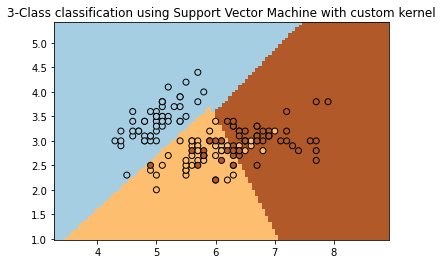

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

# 加载数据集
iris = datasets.load_iris()
#数据切片
X = iris.data[:, :2]  
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    # 矩阵X乘M后，再和Y矩阵的转置相乘
    return np.dot(np.dot(X, M), Y.T)


h = 0.02  # s网格中的步长

# 创建SVC模型进行训练
clf = svm.SVC(kernel=my_kernel)
#训练模型
clf.fit(X, Y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using Support Vector Machine with custom kernel")
plt.axis("tight")
plt.show()

## 4.随机梯度下降(SGD)
> `随机梯度下降(SGD)`是一种简单但又非常高效的方法，主要用于凸损失函数下线性分类器的判别式学习,SGD 已成功应用于在文本分类和自然语言处理中经常遇到的大规模和稀疏的机器学习问题。对于稀疏数据，本模块的分类器可以轻易的处理超过 10^5 的训练样本和超过 10^5 的特征

SGD的优势:
* 高效
* 易于实现，并且可优化

SGD的劣势:
* SGD 需要一些超参数，例如 regularization （正则化）参数和 number of iterations （迭代次数）。
* SGD 对 feature scaling （特征缩放）敏感。

## 4.随机梯度下降(SGD)
### 4.1 分类
> `SGDClassifier`类实现了一个简单的随机梯度下降学习例程, 支持分类问题不同的损失函数和正则化方法。
作为另一个`classifier`,拟合 SGD 我们需要两个数组：保存训练样本的 size 为 [n_samples, n_features] 的数组 X 以及保存训练样本目标值（类标签）的 size 为 [n_samples] 的数组 Y

具体的 loss function（损失函数） 可以通过 loss 参数来设置。 SGDClassifier 支持以下的 loss functions
* loss="hinge":软间隔线性支持向量机
* loss="modified_huber",平滑的hinge损失
* loss="log":logistuc回归

具体的惩罚方法可以通过 penalty 参数来设定, SGD 支持以下 penalties（惩罚）:
* penalty="l2": L2 norm penalty on coef_.
* penalty="l1": L1 norm penalty on coef_.
* penalty="elasticnet": Convex combination of L2 and L1（L2 型和 L1 型的凸组合）

* 具体核心API和演示demo如下

In [8]:
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X, y)   #使用SGD拟合线性模型
print(clf.coef_)
print(clf.intercept_)   #输出相关系数
print(clf.predict([[2., 2.]]))   #进行预测

[[9.85221675 9.85221675]]
[-9.99002993]
[1]


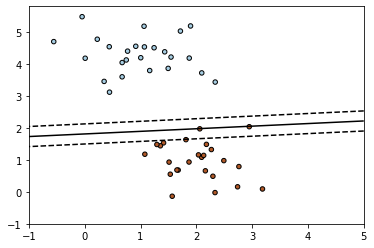

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

# 创建自定义数据集，创造50个随机点
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# 使用SGD拟合线性模型
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)

clf.fit(X, Y)  #进行拟合

# 建立对应等差数组
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)
# 生成坐标矩阵
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)  #生成对应空数组
for (i, j), val in np.ndenumerate(X1):    #遍历X1
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])  #进行分诶
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ["dashed", "solid", "dashed"]
colors = "k"
# 绘制等高线
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
# 绘制散点
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=20)

plt.axis("tight")
plt.show()

## 4.随机梯度下降(SGD)
### 4.2 回归
> `SGDRegressor`类实现了一个简单的随机梯度下降学习例程，它支持用不同的损失函数和惩罚来拟合线性回归模型。 `SGDRegressor` 非常适用于有大量训练样本（>10.000)的回归问题，
其具体的损失函数可以通过`loss`参数来设置
* 其实现demo如下

In [17]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
def SGD_linear():
    '''
    梯度下降的优化方式对波士顿房价进行预测
    :return:
    '''
    # 加载数据集
    boston = load_boston()
    # 划分数据集
    x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=22)
    # 数据正规化
    transfer = StandardScaler()
    x_train = transfer.fit_transform(x_train)
    x_test = transfer.transform(x_test)
    # 调用SGD模型进行训练
    estimator = SGDRegressor(eta0=0.005, max_iter=10000)
    estimator.fit(x_train, y_train)
    print('权重系数：\n', estimator.coef_) # 系数w
    print('偏置为：\n', estimator.intercept_) # 偏移量b
    y_predict = estimator.predict(x_test)
    print('预测房价：\n', y_predict)
    mse = mean_squared_error(y_test, y_predict)
    print('梯度下降-均方误差为：\n', mse)


if __name__ == '__main__':
    SGD_linear()


权重系数：
 [-0.64057566  0.98494502 -0.37247056  0.89401389 -1.88588399  2.77706382
 -0.18448585 -3.27362162  1.94592721 -1.00071925 -1.64233827  0.90781893
 -3.78373027]
偏置为：
 [22.57479795]
预测房价：
 [28.0677958  31.4150574  21.39974048 32.93978364 20.01203945 19.23374627
 21.28575451 19.25844529 19.56015838 32.45326335 21.26261748 27.64033356
 15.54228888 19.85300891 36.60790436 18.56479432  9.13397573 18.41607165
 30.46659809 24.26836618 19.26546068 33.67090825 29.62867392 17.68286376
 34.63658033 26.35987941 34.28066887 27.19786301 19.32239652 15.35855487
 30.4586372  14.56849853 37.23349692  7.7977426  16.28248891 17.27840065
  7.66423365 20.13198332 40.58035249 28.85742196 25.12982734 17.90931426
 39.70941575  6.98767634 21.94305487 24.98347853 20.52253765 20.51406765
 17.33926513 26.38047125  9.56050805 27.10325761 30.83043277 16.82466159
  9.48951015 35.04954545 31.61670134 22.59564836 17.42779398 21.74049824
 23.62424339 23.87444504 20.13776561 37.96238749 25.42240994 19.97701396
 14

## 5.最近邻
> `sklearn.neighbors`提供了neighbors-based (基于邻居的) 无监督学习以及监督学习方法的功能。 无监督的最近邻是许多其它学习方法的基础，尤其是 manifold learning (流形学习) 和 spectral clustering (谱聚类)。 neighbors-based (基于邻居的) 监督学习分为两种： classification （分类）针对的是具有离散标签的数据，regression （回归）针对的是具有连续标签的数据。sklearn.neighbors 提供了 neighbors-based (基于邻居的) 无监督学习以及监督学习方法的功能。 无监督的最近邻是许多其它学习方法的基础，尤其是 manifold learning(流形学习) 和 spectral clustering (谱聚类),neighbors-based (基于邻居的) 监督学习分为两种： classification （分类）针对的是具有离散标签的数据，regression （回归）针对的是具有连续标签的数据。
* 最近邻方法的基本原理是从训练样本中找到与新点在距离上最近的预定数量的几个点，然后从这些点中预测标签
* 下面将对几种最近邻算法进行详细介绍

## 5.最近邻
### 5.1 无监督最近邻
> `NearestNeighbors`（最近邻）实现了 unsupervised nearest neighbors learning（无监督的最近邻学习）。 它为三种不同的最近邻算法提供统一的接口:`BallTree`,`KDTree`,还有基于sklearn.metrics.pairwise 的 brute-force 算法。算法的选择可通过关键字algorithm来控制,并必须是 ['auto', 'ball_tree', 'kd_tree', 'brute'] 其中的一个。
* 通俗的讲，最近邻算法就是通过判断与该点最近点的特征，从而判断该点的特征
* 如下是最近邻算法的基础demo:

In [22]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# 使用最近邻算法，邻居数为2，使用BallTree来寻找最近邻
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices)
print(distances)
# 使用KDtree来寻找最近邻
kdt = KDTree(X, leaf_size=30, metric='euclidean')
print(kdt.query(X, k=2, return_distance=False))

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]
[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]


## 5.最近邻
### 5.1 最近邻分类
> 最近邻分类属于 基于实例的学习 或 非泛化学习 ：它不会去构造一个泛化的内部模型，而是简单地存储训练数据的实例.
scikit-learn 实现了两种不同的最近邻分类器： 基于每个查询点的 k 个最近邻实现，其中 k 是用户指定的整数值。RadiusNeighborsClassifier 基于每个查询点的固定半径 r 内的邻居数量实现， 其中 r 是用户指定的浮点数值。
* 演示demo如下:

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# 加载数据集
iris = load_iris()
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.25, random_state=33)
# 数据正规化
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
#调用最近邻算法
knc = KNeighborsClassifier()
#对数据进行拟合后进行预测
knc.fit(X_train, y_train)
y_predict = knc.predict(X_test)
#输出预测结果
print("The accuracy of K-Nearest Neighbor Classifier is: {sc}".format(sc=knc.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=iris.target_names))

The accuracy of K-Nearest Neighbor Classifier is: 0.8947368421052632
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.79      0.88        19

    accuracy                           0.89        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.92      0.89      0.90        38



## 5.最近邻
### 5.2 最近邻回归
> 最近邻回归是用在数据标签为连续变量，而不是离散变量的情况下。分配给查询点的标签是由它的最近邻标签的均值计算而来的。

scikit-learn 实现了两种不同的最近邻回归：`KNeighborsRegressor`基于每个查询点的 k 个最近邻实现， 其中 k 是用户指定的整数值。`RadiusNeighborsRegressor`基于每个查询点的固定半径 r 内的邻点数量实现,其中r是用户指定的浮点数值。

* 演示demo如下:

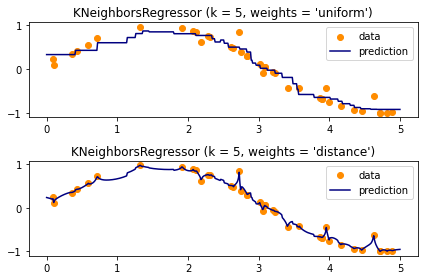

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
# 生成随机数
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis] #增加维度
y = np.sin(X).ravel()  #生成目标函数

# A为目标点增加噪声
y[::5] += 1 * (0.5 - np.random.rand(8))
n_neighbors = 5
# 设置邻居数
for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)  #对数据拟合后进行预测
    # 绘制相关图表
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")  #绘制散点
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

## 5.最近邻
### 5.3 最近邻算法详解
#### 5.3.1 暴力计算
最近邻的快速计算是机器学习中一个活跃的研究领域。最简单的近邻搜索的实现涉及数据集中所有成对点之间距离的暴力计算： 对于 D 维度中的 N 个样本来说, 这个方法的复杂度是 O(N^2), 对于小数据样本，高效的暴力近邻搜索是非常有竞争力的。 然而，随着样本数 N 的增长，暴力方法很快变得不切实际了。在 sklearn.neighbors 类中， 暴力近邻搜索通过关键字algorithm = 'brute'来指定，并通过 sklearn.metrics.pairwise 中的例程来进行计算。
#### 5.3.2  K-D 树
为了解决效率低下的暴力计算方法，已经发明了大量的基于树的数据结构。总的来说,这些结构试图通过有效地编码样本的`aggregate distance`(聚合距离)信息来减少所需的距离计算量。 基本思想是，若 A 点距离 B 点非常远，B 点距离 C 点非常近,可知 A 点与 C 点很遥远，不需要明确计算它们的距离,通过这样的方式，近邻搜索的计算成本可以降低为 O[Nlog(N)] 或更低,这是对于暴力搜索在大样本数 N 中表现的显著改善。
在 scikit-learn 中, KD 树近邻搜索可以使用关键字`algorithm = 'kd_tree'`来指定, 并且使用类`KDTree`来计算。
#### 5.3.3  Ball树
为了解决 KD 树在高维上效率低下的问题, ball 树 数据结构就被研发出来了. 其中 KD 树沿笛卡尔轴（即坐标轴）分割数据, ball 树在沿着一系列的 hyper-spheres 来分割数据. 通过这种方法构建的树要比 KD 树消耗更多的时间, 但是这种数据结构对于高结构化的数据是非常有效的, 即使在高维度上也是一样.
ball 树将数据递归地划分为由质心 C 和半径 R 定义的节点,使得节点中的每个点位于由 r 和 C 定义的 hyper-sphere 内. 通过使用 triangle inequality（三角不等式） 减少近邻搜索的候选点数:
通过这种设置, 测试点和质心之间的单一距离计算足以确定距节点内所有点的距离的下限和上限. 由于 ball 树节点的球形几何, 它在高维度上的性能超出 KD-tree, 尽管实际的性能高度依赖于训练数据的结构. 在 scikit-learn 中, 基于 ball 树的近邻搜索可以使用关键字 algorithm = 'ball_tree' 来指定, 并且使用类 sklearn.neighbors.BallTree 来计算. 或者, 用户可以直接使用 BallTree 类.

## 6.决策树
> Decision Trees (DTs) 是一种用来 classification 和 regression 的无参监督学习方法。其目的是创建一种模型从数据特征中学习简单的决策规则来预测一个目标变量的值。
例如，在下面的图片中，决策树通过if-then-else的决策规则来学习数据从而估测数一个正弦图像。决策树越深入，决策规则就越复杂并且对数据的拟合越好。
![决策树](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

决策树优势:
* 便于理解和解释。树的结构可以可视化出来。
* 训练需要的数据少。其他机器学习模型通常需要数据规范化，比如构建虚拟变量和移除缺失值,不过请注意，这种模型不支持缺失值。
* 由于训练决策树的数据点的数量导致了决策树的使用开销呈指数分布(训练树模型的时间复杂度是参与训练数据点的对数值)。
决策树缺点:
* 决策树模型容易产生一个过于复杂的模型,这样的模型对数据的泛化性能会很差。这就是所谓的过拟合.一些策略像剪枝、设置叶节点所需的最小样本数或设置数的最大深度是避免出现 该问题最为有效地方法。
* 决策树可能是不稳定的，因为数据中的微小变化可能会导致完全不同的树生成。这个问题可以通过决策树的集成来得到缓解
* 在多方面性能最优和简单化概念的要求下，学习一棵最优决策树通常是一个NP难问题。因此，实际的决策树学习算法是基于启发式算法，例如在每个节点进 行局部最优决策的贪心算法。这样的算法不能保证返回全局最优决策树。这个问题可以通过集成学习来训练多棵决策树来缓解,这多棵决策树一般通过对特征和样本有放回的随机采样来生成。


## 6.决策树
### 6.1决策树分类
> `DecisionTreeClassifier`是能够在数据集上执行多分类的类,与其他分类器一样，`DecisionTreeClassifier`采用输入两个数组：数组X，用 [n_samples, n_features] 的方式来存放训练样本。整数值数组Y，用 [n_samples] 来保存训练样本的类标签:
* 演示demo如下

In [54]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
# 使用决策树进行拟合
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
# 进行预测
print(clf.predict([[2., 2.]]))
# 预测每个类的概率
print(clf.predict_proba([[2., 2.]]))


[1]
[[0. 1.]]


## 6.决策树
### 6.1决策树回归
> 决策树通过使用 DecisionTreeRegressor 类也可以用来解决回归问题。如在分类设置中，拟合方法将数组X和数组y作为参数，只有在这种情况下，y数组预期才是浮点值:
* 如下为demo展示

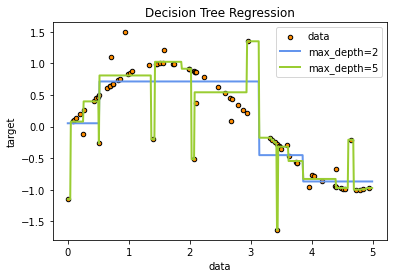

In [51]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 创建随机数据集
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))  #添加噪声

# 对数据进行拟合
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# 使用模型进行预测
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] #数据增维
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# 将结果以图表形式展示
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## 6.决策树
### 6.2多值输出问题
> 一个多值输出问题是一个类似当 Y 是大小为 [n_samples, n_outputs] 的2d数组时，有多个输出值需要预测的监督学习问题。
当输出值之间没有关联时，一个很简单的处理该类型的方法是建立一个n独立模型，即每个模型对应一个输出，然后使用这些模型来独立地预测n个输出中的每一个。然而，由于可能与相同输入相关的输出值本身是相关的，所以通常更好的方法是构建能够同时预测所有n个输出的单个模型
* 该模块通过在 DecisionTreeClassifier和 DecisionTreeRegressor 中实现该策略来支持多输出问题。如果决策树与大小为 [n_samples, n_outputs] 的输出数组Y向匹配，则得到的估计器: * predict 是输出n_output的值 * 在 predict_proba 上输出 n_output 数组列表
* 如下为demo展示

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# 创建数据集
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
# 添加噪声
y[::5, :] += 0.5 - rng.rand(20, 2)

# 调用决策树训练模型
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# 利用拟合好的模型进行预测
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# 以图表的方式进行展示
plt.figure()
s = 25
# 绘制散点
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(
    y_1[:, 0],
    y_1[:, 1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label="max_depth=2",
)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(
    y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8"
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()

## 7.神经网络模型(有监督)
### 7.1 多层感知机
> 多层感知器(MLP)是一种监督学习算法，通过在数据集上训练来学习函数$f(\cdot): R^{m} \rightarrow R^{o}$,其中 m 是输入的维数，o 是输出的维数。 给定一组特征 X = {x_1, x_2, ..., x_m} 和标签 y ，它可以学习用于分类或回归的非线性函数。 与逻辑回归不同的是，在输入层和输出层之间，可以有一个或多个非线性层，称为隐藏层。 图1 展示了一个具有标量输出的单隐藏层 MLP。
* ![多层感知机](https://img-blog.csdnimg.cn/20190623203530221.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2ZnMTM4MjEyNjc4MzY=,size_16,color_FFFFFF,t_70)
* 其具体demo如下所示

多层感知机优点:
* 可以学习得到非线性模型。
* 使用partial_fit 可以学习得到实时模型（在线学习）。
多层感知机缺点:
* 具有隐藏层的 MLP 具有非凸的损失函数，它有不止一个的局部最小值。 因此不同的随机初始化权重会导致不同的验证集准确率。
* MLP 需要调试一些超参数，例如隐藏层神经元的数量、层数和迭代轮数。
* MLP 对特征归一化很敏感


## 7.神经网络模型(有监督)
### 7.2 多层感知机分类
> `MLPClassifier` 类实现了通过 `Backpropagation` 进行训练的多层感知器（MLP）算法。
MLP 在两个数组上进行训练：大小为 (n_samples, n_features) 的数组 X，用来储存表示训练样本的浮点型特征向量; 大小为 (n_samples,) 的数组 y，用来储存训练样本的目标值（类别标签）
* 如下为演示demo和实际应用


learning on dataset iris
training: constant learning-rate
Training set score: 0.980000
Training set loss: 0.096950
training: constant with momentum
Training set score: 0.980000
Training set loss: 0.049530
training: constant with Nesterov's momentum
Training set score: 0.980000
Training set loss: 0.049540
training: inv-scaling learning-rate
Training set score: 0.360000
Training set loss: 0.978444
training: inv-scaling with momentum
Training set score: 0.860000
Training set loss: 0.503452
training: inv-scaling with Nesterov's momentum
Training set score: 0.860000
Training set loss: 0.504185
training: adam
Training set score: 0.980000
Training set loss: 0.045311

learning on dataset digits
training: constant learning-rate
Training set score: 0.956038
Training set loss: 0.243802
training: constant with momentum
Training set score: 0.992766
Training set loss: 0.041297
training: constant with Nesterov's momentum
Training set score: 0.993879
Training set loss: 0.042898
training: inv-scaling 

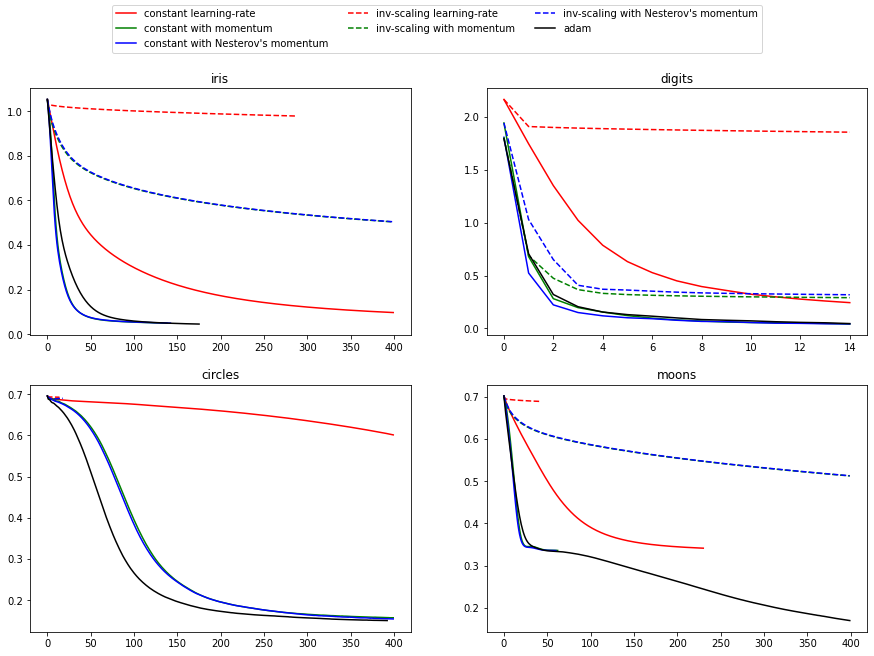

In [5]:
import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# 不同的学习率和动量参数
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": True,
        "learning_rate_init": 0.2,
    },
    {
        "solver": "sgd",
        "learning_rate": "invscaling",
        "momentum": 0.9,
        "nesterovs_momentum": False,
        "learning_rate_init": 0.2,
    },
    {"solver": "adam", "learning_rate_init": 0.01},
]

labels = [
    "constant learning-rate",
    "constant with momentum",
    "constant with Nesterov's momentum",
    "inv-scaling learning-rate",
    "inv-scaling with momentum",
    "inv-scaling with Nesterov's momentum",
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
    {"c": "blue", "linestyle": "--"},
    {"c": "black", "linestyle": "-"},
]


def plot_on_dataset(X, y, ax, name):
    # 对于每个数据集，绘制不同学习策略的学习图
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # 数字越大收敛速度越快
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        # 调用多感知分类器
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # 有些参数不会收敛
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# load / generate some toy datasets
iris = datasets.load_iris()  #加载数据集
#提取数据集
X_digits, y_digits = datasets.load_digits(return_X_y=True)
data_sets = [
    (iris.data, iris.target),
    (X_digits, y_digits),
    datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
    datasets.make_moons(noise=0.3, random_state=0),
]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["iris", "digits", "circles", "moons"]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

## 7.神经网络模型(有监督)
### 7.3 多层感知机正则化
> `MLPRegressor` 类和 `MLPClassifier`类都使用参数 alpha 作为正则化( L2 正则化)系数，正则化通过惩罚大数量级的权重值以避免过拟合问题
* 其演示demo如下

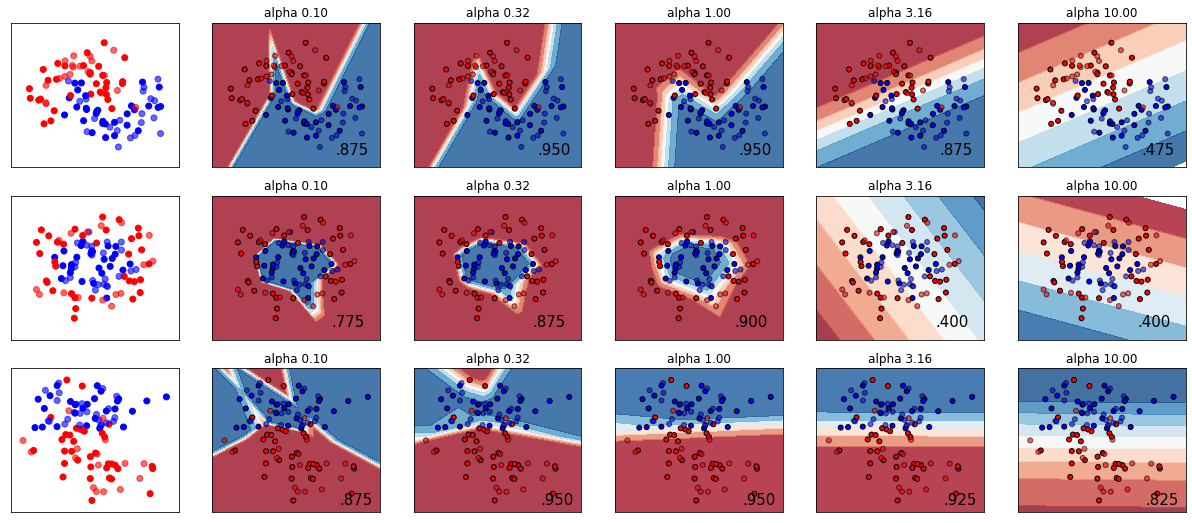

In [3]:
import warnings
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = 0.02  # 学习步长

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(    #设置多层感知器中的参数
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")
# 进行训练
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
# 数据正则化
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]
# 绘制结果图表
figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )
    # 数据切片处理
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # 网格化数据
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 绘制数据集
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # 绘制训练集散点图
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # 迭代分类器
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        #训练模型
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # 绘制决策边界
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # 展示结果
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()